# Regression example

In [13]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential   # build neural network layers sequentially. 1st layer, 2nd layer.......
from keras.layers import Dense   # 
np.random.seed(42)   # reproducibility

## create some data

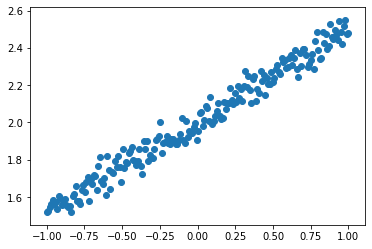

In [14]:
X = np.linspace(-1,1,200)
np.random.shuffle(X)   # randomize the data
Y=0.5*X+2+np.random.normal(0,0.05,(200,))   # weight is 0.5, bias is 2
# Y=0.5*X+2
# plot data
plt.scatter(X,Y)
plt.show()

X_train, Y_train = X[:160], Y[:160]   # 0 - 160 data points
X_test, Y_test = X[160:], Y[160:]   # 160-200 data points

## build a neural network from the 1st layer to the last layer 

In [19]:
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))

# choose loss function and optimizing method

model.compile(loss='mse', optimizer='sgd')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


## training

In [23]:
print('Training ----------')
for step in range(301):
    cost = model.train_on_batch(X_train,Y_train)
    if step % 100 ==0:
        print('train cost:', cost)

Training ----------
train cost: 0.015958628
train cost: 0.005876592
train cost: 0.003263859
train cost: 0.0025856313


## test 

In [24]:
print('Test -----------')
cost = model.evaluate(X_test,Y_test,batch_size=10)
print('test cost:', cost)
W,b = model.layers[0].get_weights()
print('Weights=',W,'\nbiases=',b)

Test -----------
40/40 [==============================] - 0s 86us/step
test cost: 0.0025744086015038192
Weights= [[0.4595167]] 
biases= [2.0079703]


## plotting the prediction 

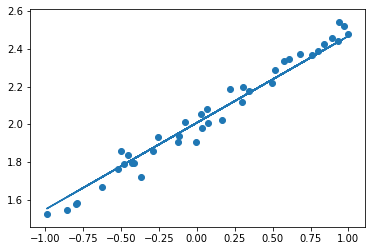

In [25]:
Y_pred = model.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred)
plt.show()